<a href="https://colab.research.google.com/github/carloslizarragac/FisicaComputacional1/blob/master/Actividad11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Solución Numérica de la Ecuación de Onda

La ecuación de onda es una ecuación diferencial parcial de segundo orden en el tiempo y las coordenadas espaciales y tiene la forma

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2} +
  \frac{\partial^2 u}{\partial y^2} +
  \frac{\partial^2 u}{\partial z^2} \right)
\end{equation*}

donde $c^2$ es la velocidad de propagación de la información. La función $u(x,y,z,t)$ representa la presión en una onda acústica, la intensidad de un campo electromagnético, el desplazamiento respecto a un nivel de referencia como lo puede ser la amplitud de una onda superficial en la superficie del agua o el desplazamiento respecto a la horizontal de una cuerda vibrante. 

En una dimensión, por ejemplo el caso de una cuerda vibrante, la Ecuación de Onda se simplifica a 

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) \qquad x \in (0,L], t \in (0,T]
\end{equation*}

Requerimos definir las condiciones iniciales y a la frontera para encontrar la solución.

\begin{eqnarray*}
u(x,0) & = & f(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}

Se requiere también especificar el valor de la constante $c$ y la función $f(x)$.


**Solución de la Ecuación de Onda en una dimensión por el Método de Diferencias Finitas.**

Podemos comenzar aproximando las segundas derivadas por diferencias finitas centradas de segundo orden.

Si $h$ es el incremento en la dirección $x=\Delta x$ y $k=\Delta t$ es el incremento en el tiempo. Entonces en un punto de la malla discreta $(x,t)$ tendremos

\begin{equation*}
\frac{u(x,t+k) -2u(x,t) + u(x,t-k)}{k^2} = c^2
\frac{u(x+h,t) -2u(x,t) + u(x-h,t)}{h^2}
\end{equation*}

La ecuación anterior define un esténcil computacional de 5 puntos y se respresenta como

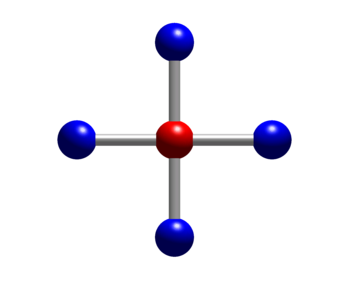

El cual nos permite calcular los valores de $u(x,t)$ en el espacio discretizado:
$x_0=0,x_1,x_2,\ldots, x_M=L$, $t_0=0, t_1, t_2, \ldots, t_N=T$, espaciados uniformamente por $h = \Delta x$ y $k=\Delta t$.  

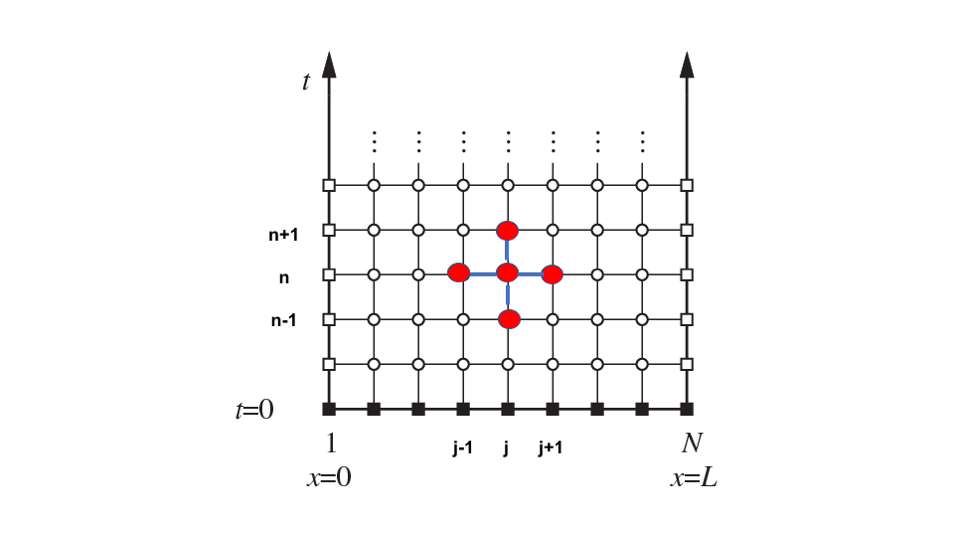


Para inicial el algoritmo tendremos que calcular el primer nivel de $u(x,k)$ en $t=k$, usando sólo la información de la condición inicial, con otro esténcil de 4 puntos similar al que utilizamos en la Ecuación de Calor.

Una vez hecho esto, ya podremos calcular todos los valores futuros de $u(x,t+k)$ ya que se conocen los valores de $u(x,t)$ y $u(x,t-k)$.

**Ecuación de Onda en diferencias finitas**

Si definimos $u(x,t) = u(jh, nk) = u_j^n$, la ecuación de onde la podemos expresar 

\begin{equation*}
\frac{u_j^{n+1} - 2 u_j^n + u_j^{n-1}}{k^2} = c^2
\frac{u_{j+1}^n - 2 u_j^n + u_{j-1}^n}{h^2}
\end{equation*}

y despejamos para el valor desconocido $u_j^{n+1}$

\begin{equation*}
u_j^{n+1} = 2 u_j^n - u_j^{n-1} + C^2 (u_{j+1}^n - 2 u_j^n + u_{j-1}^n)
\end{equation*}

donde hemos introducido la constante $C^2 = c^2 k^2/h^2$, conocida como la constante de Courant.

**Iniciando el algoritmo**

Como no se puede aplicar el esténcil de 5 puntos pata calcular el primer nivel usaremos un esténcil similar de 4 puntos con la información de la condición inicial para calcular $u(x,t=k)$.

Remplazamos la condición inicial por diferencias finitas centradas de segundo orden

\begin{equation*}
\frac{\partial}{\partial t} u_j^0 = 
\frac{u_j^1 - u_j^{-1}}{2k}  = 0 
\end{equation*}

lo que indica que $u_j^1 = u_j^{-1}$.

Sustituimos la igualdad anterior en la ecuación de onda y nos queda que

\begin{equation*}
u_j^1 = u_j^0 + \frac{C^2}{2} (u_{j+1}^0 -2 u_j^0 + u_{j-1}^0)
\end{equation*}

Y ya tendremos dos niveles de valores para $u(x,t)$ para calcular los valores de $u_j^{n+1}$ usando el esténcil de 5 puntos. 

In [2]:
# Importamos algunas bibliotecas necesarias

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from numpy import linspace, zeros

%matplotlib inline
plt.style.use('bmh')


In [3]:
# Se define una función que resuelve la Ecuación de Onda 

def solver(I, V, f, c, L, Nx, C, T, user_action=None):
    """Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T]."""
    x = linspace(0, L, Nx+1) # Malla en x
    dx = x[1] - x[0]
    dt = C*dx/c
    Nt = int(round(T/dt))
    t = linspace(0, Nt*dt, Nt+1) # Malla en t
    C2 = C**2 # Simplificar la ecuación
    
    if f is None or f == 0 :
        f = lambda x, t: 0
    
    if V is None or V == 0:
        V = lambda x: 0
    u = zeros(Nx+1) # Solución al nuevo tiempo
    u_1 = zeros(Nx+1) # Solución 1 paso atrás en el tiempo
    u_2 = zeros(Nx+1) # Solución 2 pasos atrás en el tiempo
    
    import time; 
    #t0 = time.clock() # Mediremos el tiempo de CPU
    t0 = time.process_time()

    # Cargar la condición inicial en u_1
    for i in range(0,Nx+1):
        u_1[i] = I(x[i])

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    # Fórmula del primer paso
    n = 0
    for i in range(1, Nx):
        u[i] = u_1[i] + dt*V(x[i]) + \
        0.5*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
        0.5*dt**2*f(x[i], t[n])
    u[0] = 0; u[Nx] = 0
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    # Redefinimos variables para volver a utilizar
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        # Actualiza los valores en el tiempo t[n+1]
        for i in range(1, Nx):
            u[i] = - u_2[i] + 2*u_1[i] + \
            C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
            dt**2*f(x[i], t[n])
        # Definimos la condición a la frontera
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        # Redefinimos variables antes del siguiente paso
        u_2[:], u_1[:] = u_1, u

    # cpu_time = t0 - time.clock()
    cpu_time = t0 - time.process_time()
    return u, x, t, cpu_time

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))



In [9]:
# Ejemplo de una cuerda vibrante L=1, t=(0,0.25), c=100M/s

user_data = {}
u, x, t, cpu_time = solver(lambda x: x*(1-x), None, None, 100, 1, 100, 0.1, 0.25, user_action=user_action)


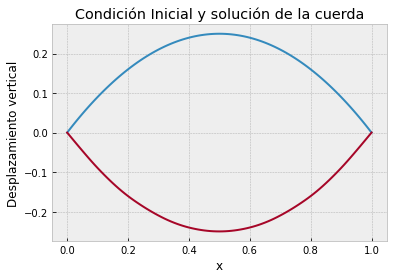

In [11]:
# Graficamos la solución
I = x*(1-x)
plt.xlabel('x')
plt.ylabel('Desplazamiento vertical')
plt.title('Condición Inicial y solución de la cuerda')
plt.plot(x,I)
plt.plot(x, u);


In [12]:
# Gráfica interactiva

@interact
def browse_simulation_result(n=(0, len(user_data['u']) - 1)):
    "Grafica un cuadro de la simulación."
    x = user_data['x']
    t, u = user_data['u'][n]
    plt.plot(x, u)
    plt.title('t = {:.2f}'.format(t))
    plt.ylim(-0.25, 0.25)
    plt.xlabel('x')
    plt.ylabel('Desplazamiento vertical')
    plt.title('Movimiento de la cuerda vibrante')


interactive(children=(IntSlider(value=12500, description='n', max=25000), Output()), _dom_classes=('widget-int…

In [22]:
# Animación

from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

duration = 30

fig, ax = plt.subplots(figsize=(4, 3), facecolor='white', dpi=92)
plt.tight_layout()

def make_frame_mpl(t):
    n = int(t / duration * (len(user_data['u']) - 1))
    ax.clear()
    x = user_data['x']
    t, u = user_data['u'][n]
    ax.plot(x, u)
    ax.set_title('t = {:.2f}'.format(t))
    ax.set_ylim(-0.25, 0.25)
    ax.set_xlabel('x (a. u.)')
    ax.set_ylabel('Desplazamiento vertical (a. u.)')
    return mplfig_to_npimage(fig) # imágen de la figura

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
plt.close(fig)
animation.ipython_display(fps=25, width=600)


100%|█████████▉| 750/751 [01:01<00:00, 12.18it/s]
